# I. Project Team Members

| Prepared by | Email | Prepared for |
| :-: | :-: | :-: |
| **_Your Name_** | _Your Email_ | **_Project Name_** |

# II. Notebook Target Definition

_Insert Text Here_

# III. Notebook Setup

## III.A. Import Libraries

In [1]:
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## III.B. Import Data

In [2]:
df = pd.read_pickle('../../../data/processed/df.pkl')

In [3]:
df.head()

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13
5,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i b...,sugared raspberries,10,37449,2005-05-02,"['15-minutes-or-less', 'time-to-make', 'course...","[838.0, 1.0, 820.0, 0.0, 2.0, 0.0, 71.0]",6,"['carefully pick over the berries , removing l...",here's an old method for preserving fruit with...,"['raspberries', 'granulated sugar']",2


# IV. Exploratory Data Analysis

## IV.A. Data Shape Inspection

In [4]:
df.shape

(1108856, 16)

## IV.B. Data Information Inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1108856 entries, 0 to 1132366
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   user_id         1108856 non-null  object        
 1   recipe_id       1108856 non-null  object        
 2   date            1108856 non-null  datetime64[ns]
 3   rating          1108856 non-null  int64         
 4   review          1108688 non-null  object        
 5   name            1108856 non-null  object        
 6   minutes         1108856 non-null  int64         
 7   contributor_id  1108856 non-null  object        
 8   submitted       1108856 non-null  datetime64[ns]
 9   tags            1108856 non-null  object        
 10  nutrition       1108856 non-null  object        
 11  n_steps         1108856 non-null  int64         
 12  steps           1108856 non-null  object        
 13  description     1108856 non-null  object        
 14  ingredients     1108856

## IV.C. Missing Values Inspection

In [6]:
df_missing = pd.DataFrame(
    df.isnull().sum().sort_values() / len(df) * 100).reset_index()
df_missing.columns = ["variables", "missing_percentage"]
df_missing

,variables,missing_percentage
0,user_id,0.000000
1,recipe_id,0.000000
2,date,0.000000
3,rating,0.000000
4,name,0.000000
5,minutes,0.000000
6,contributor_id,0.000000
7,submitted,0.000000
8,tags,0.000000
9,nutrition,0.000000


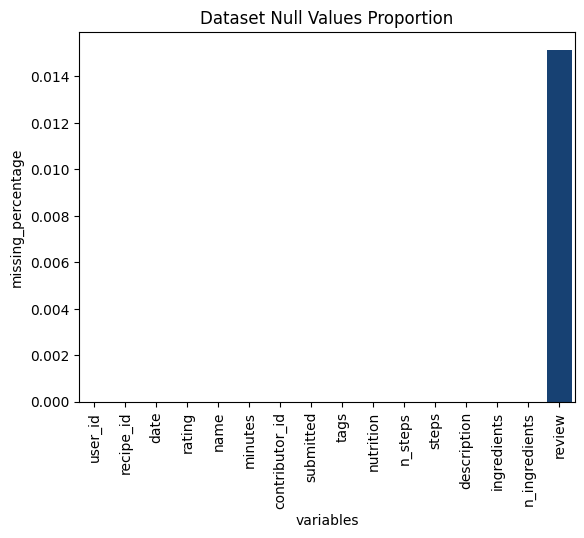

In [7]:
sns.barplot(data=df_missing,
            x="variables",
            y="missing_percentage",
            palette='Blues')
plt.title("Dataset Null Values Proportion")
plt.xticks(rotation='vertical')
plt.show()

## IV.D. Duplicated Values Inspection

In [8]:
df_duplicated = df[df.duplicated(keep=False)]
df_duplicated.shape

(0, 16)

In [9]:
df_duplicated

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients


## IV.E. Data Visualization

### IV.E.1. Ratings Distribution

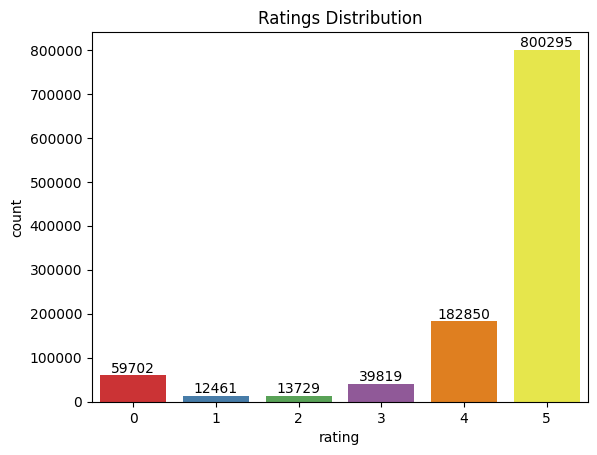

In [10]:
plt.title("Ratings Distribution")
ratings_distribution = sns.countplot(data=df, x="rating", palette='Set1')
ratings_distribution.bar_label(ratings_distribution.containers[0])
plt.show()

### IV.E.2. Top 10 Most Rated Recipes

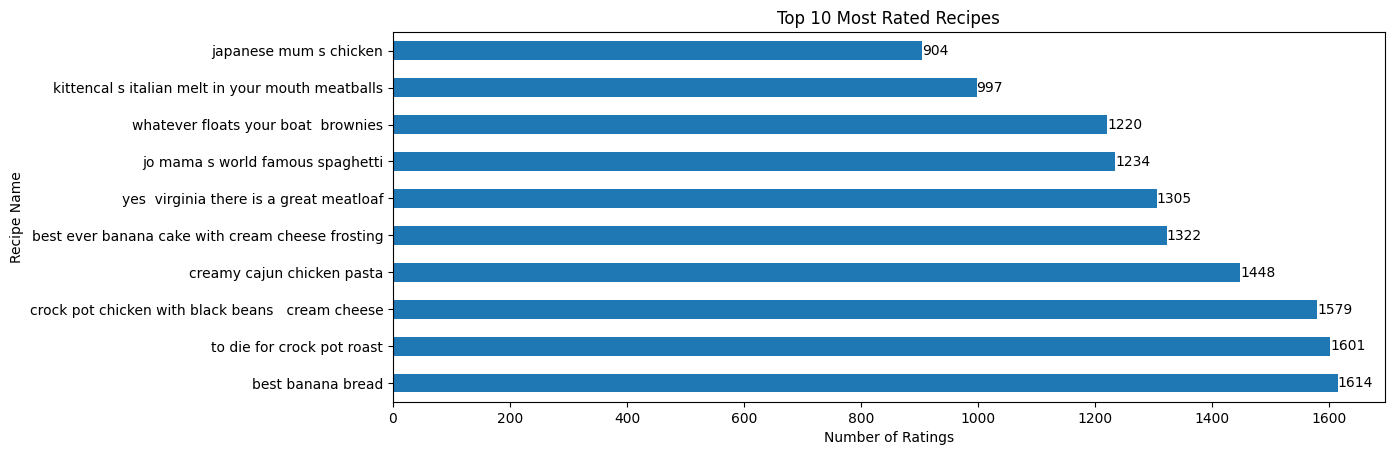

In [11]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Top 10 Most Rated Recipes")
ratings_per_recipe = df.groupby(
    "name")["rating"].count().sort_values(ascending=False)
bars = ratings_per_recipe.head(10).plot(kind='barh')
for bar in bars.containers:
    bars.bar_label(bar)
plt.xlabel("Number of Ratings")
plt.ylabel("Recipe Name")
plt.show()

### IV.E.3. Top 10 Users with Most Ratings

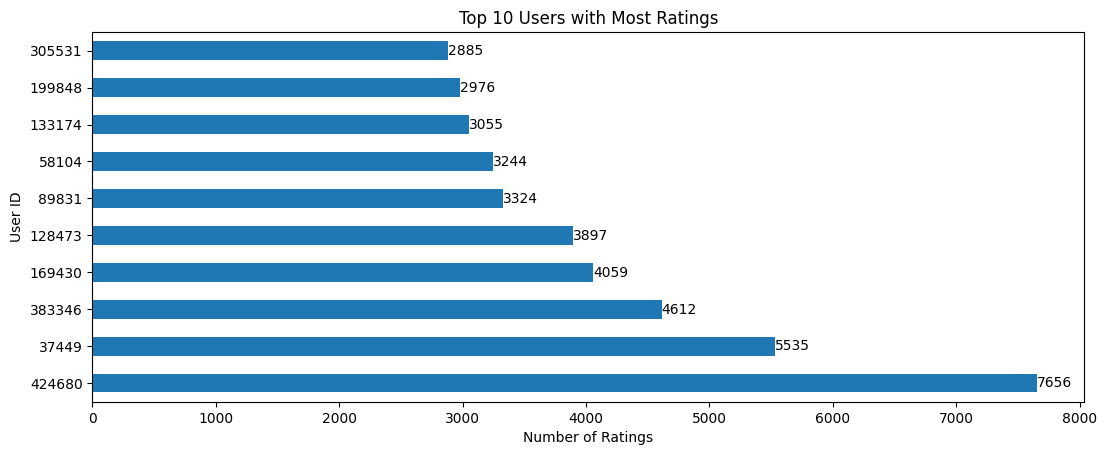

In [12]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Top 10 Users with Most Ratings")
ratings_per_user = df.groupby(
    "user_id")["rating"].count().sort_values(ascending=False)
bars = ratings_per_user.head(10).plot(kind='barh')
for bar in bars.containers:
    bars.bar_label(bar)
plt.xlabel("Number of Ratings")
plt.ylabel("User ID")
plt.show()

### IV.E.4. Distribution of Number of Ingredients per Recipe

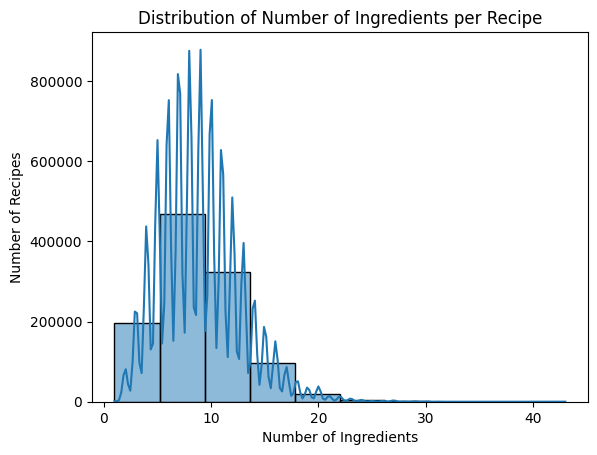

In [13]:
sns.histplot(df["n_ingredients"], bins=10, kde=True)
plt.title("Distribution of Number of Ingredients per Recipe")
plt.xlabel("Number of Ingredients")
plt.ylabel("Number of Recipes")
plt.show()

### IV.E.5. Distribution of Preparation Time

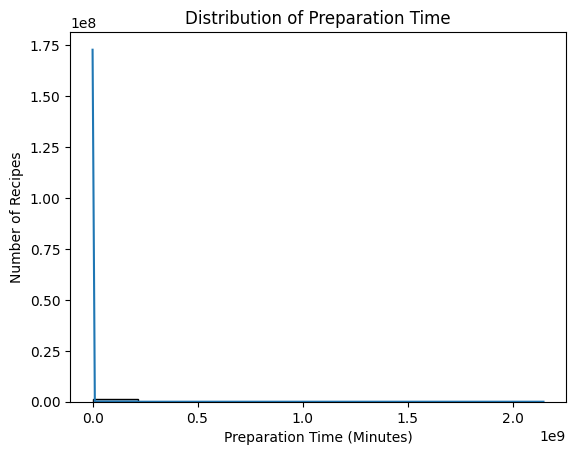

In [14]:
sns.histplot(df["minutes"], bins=10, kde=True)
plt.title("Distribution of Preparation Time")
plt.xlabel("Preparation Time (Minutes)")
plt.ylabel("Number of Recipes")
plt.show()

### IV.E.6. Most Common Words in Reviews

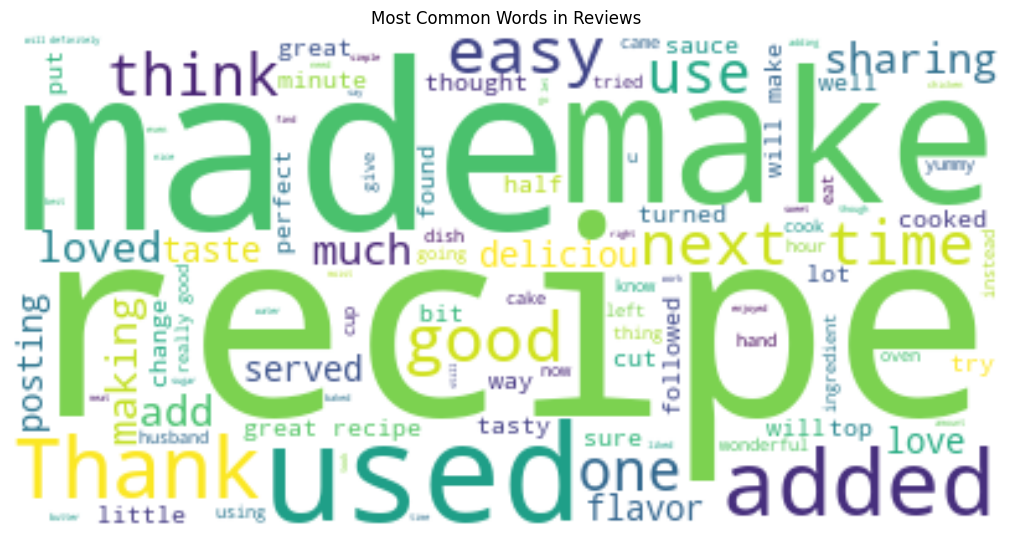

In [15]:
text = ' '.join(df["review"].dropna().tolist())
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
plt.figure(figsize=(12.8, 9.6))
plt.title("Most Common Words in Reviews")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### IV.E.7. Most Common Words in Ingredients

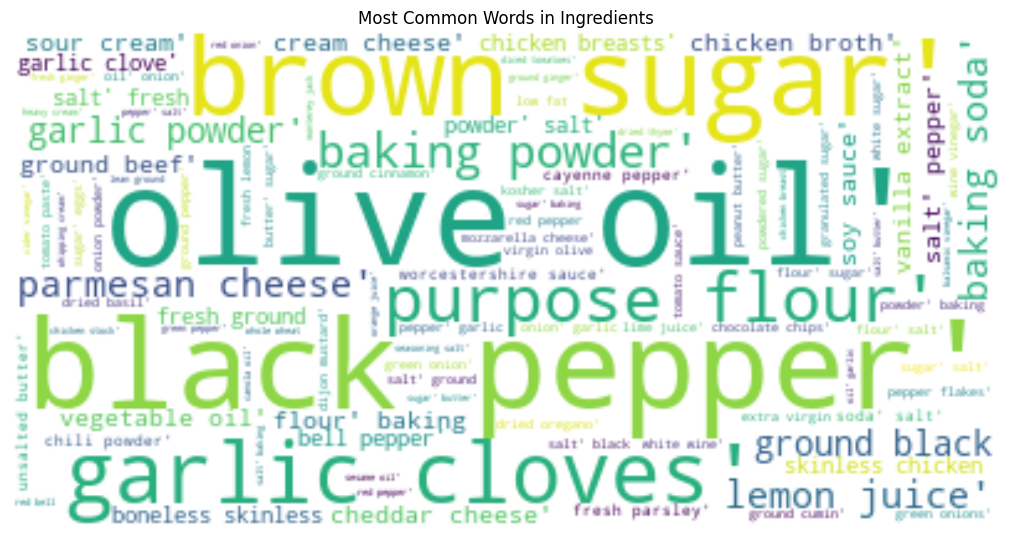

In [16]:
text = ' '.join(df["ingredients"].dropna().tolist())
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
plt.figure(figsize=(12.8, 9.6))
plt.title("Most Common Words in Ingredients")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## IV.G. Correlation Matrix

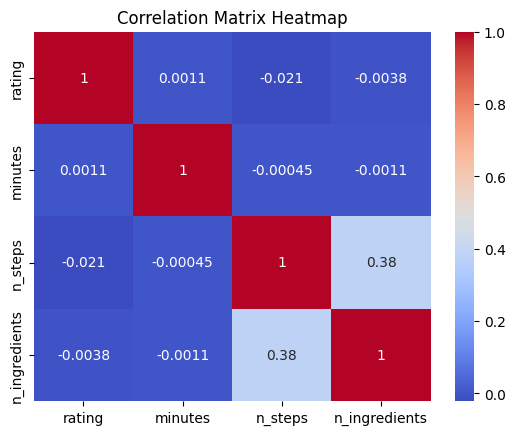

In [17]:
corr_matrix = df[["rating", "minutes", "n_steps", "n_ingredients"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# V. Preprocessing

## V.A. Data Splitting

In [18]:
users_with_one_rating = df["user_id"].value_counts(
)[df["user_id"].value_counts() == 1].index
df_filtered = df[~df["user_id"].isin(users_with_one_rating)]
train, test = train_test_split(
    df_filtered, test_size=0.3, random_state=777, stratify=df_filtered["user_id"])

In [19]:
train.shape, test.shape

((661320, 16), (283424, 16))

## V.B. Export Data

In [20]:
train.to_pickle('../../../data/processed/train.pkl')
test.to_pickle('../../../data/processed/test.pkl')